In [ ]:
from PIL import Image
from numpy import array, exp
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Se abre la imagen.
foto = Image.open("capi.jpg")
# Se redimenciona pa mas facil.
ancho = 128
alto = 128
foto = foto.resize((ancho, alto))
# foto.show()
# Se obtienen los 3 canales.
roja = foto.getchannel("R")
verde = foto.getchannel("G")
azul = foto.getchannel("B")
# Se pasan a matriz.
arreglo = np.array(foto)
arr_r = np.array(roja)
arr_g = np.array(verde)
arr_b = np.array(azul)

arr_r = arr_r.flatten()
arr_g = arr_g.flatten()
arr_b = arr_b.flatten()

# print("arr_r")
# print(arr_r)

# print("arr_g")
# print(arr_g)

# print("arr_b")
# print(arr_b)

In [ ]:
# Funcion vergas.
plt.style.use('seaborn-poster')
# matplotlib inline

# x es un arreglo de numeros
def FFT(x):
    N = len(x)

    print(N)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

In [ ]:
# x es un arreglo de numeros
def FFTI(x):
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = FFTI(x[::2])
        X_odd = FFTI(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

In [ ]:
#  transpuesta de la matriz
# buf es un numero complejo, rowLen es un entero
def transpose(buf, rowLen):
    for i in range(rowLen):
        for j in range(i+1, rowLen):
            temp = buf[i*rowLen + j]
            buf[i*rowLen + j] = buf[j*rowLen + i]
            buf[j*rowLen + i] = temp

In [ ]:
def fft_2d(buf, rowLen, n):
    for i in range(0, n, rowLen):
        print("i: ",i)
        FFT(buf+i)
    transpose(buf, rowLen)

    for i in range(0, n, rowLen):
        FFT(buf+i)
    transpose(buf, rowLen)

    return buf

In [ ]:
def union_imgs(arr_r,arr_g,arr_b):
     # matriz que contiene la nueva imagen
     union = np.zeros((256, 256, 3), dtype=np.uint8)

     # Asigna valores a cada canal de color
     union[:, :, 0] = arr_r  # valores de rojo
     union[:, :, 1] = arr_g  # valores de verde
     union[:, :, 2] = arr_b  # valores de azul

     # Crea una imagen RGB desde la matriz tridimensional
     imagen = Image.fromarray(union)

     # Guarda la imagen en un archivo
     plt.imshow(imagen)

In [ ]:
procesada_r=fft_2d(arr_r, ancho, ancho**2)
procesada_g=fft_2d(arr_g, ancho, ancho**2)
procesada_b=fft_2d(arr_b, ancho, ancho**2)
    
print("listo :)")

In [ ]:
procesada_r = procesada_r.reshape(256,256)
procesada_g = procesada_g.reshape(256,256)
procesada_b = procesada_b.reshape(256,256)

union_imgs(procesada_r,procesada_g,procesada_b)

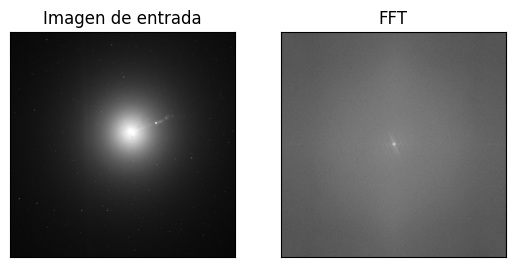

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('eliptica2.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitudFFT = 20*np.log(np.abs(fshift))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagen de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitudFFT, cmap = 'gray')
plt.title('FFT'), plt.xticks([]), plt.yticks([])
plt.show()